In [12]:
import json
#


# Loading file and analyze location
def is_from_washington(location):
	true_list = [
		"washington",
		"seattle",
		"kirkland",
		"wa"
	]

	false_list = [
		"dc",
		"d.c."
	]

	flag = False
	location = location.split()


	for s in false_list:
		if s in location:
			flag = False
			return flag
			
	for s in true_list:
		if s in location:
			flag = True
			return flag

	return flag

def is_from_massachusetts(location):
	true_list = [
		"massachusetts",
		"ma",
		"boston",
		"northampton",
		"springfield",
		"plymouth",
		"arlington",
		"scituate",
		"worcester"
	]

	location = location.split()

	false_list = [
		"ohio",
	]
	flag = False

	for s in false_list:
		if s in location:
			flag = False
			return flag
				
	for s in true_list:
		if s in location:
			flag = True
			return flag

	return flag
'''
def is_from_washington(loc):
	return 'washington' in loc or 'wa' in loc or  'seattle' in loc or 'kirkland' in loc

def is_from_massachusetts(loc):
	return 'massachusetts' in loc or ' ma' in loc or 'boston' in loc or "northampton"in loc or "springfield" in loc or "plymouth" in loc or "arlington"in loc or "scituate" in loc or "worcester" in loc
'''
# extracting tweet data
hashtag = '#superbowl'
fname = 'ECE219_tweet_data/tweets_#superbowl.txt'

tweet_texts = []
tweet_label = []
i = 0

filestream = open(fname, 'r')
for line in filestream:
	tweet = json.loads(line)
	tweet_text = tweet['tweet']['text']

	user_location = tweet['tweet']['user']['location'].lower()
	if is_from_washington(user_location):
	    tweet_texts.append(tweet_text)
	    tweet_label.append(1)

	elif is_from_massachusetts(user_location):
	    tweet_texts.append(tweet_text)
	    tweet_label.append(-1)

filestream.close()

print(len(tweet_texts))




36508


In [13]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import string
import nltk
import sklearn.metrics as smet
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import svm
import sklearn.metrics as smet
from sklearn.svm import SVC
from sklearn.preprocessing import normalize



In [14]:
def myTokenizer(text):
	# update stopwords with punctuations
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.lower()
    stopWords = set(string.punctuation)
    stopWords.update(set(stopwords.words('english')))
    # engStemmer = SnowballStemmer('english')
    wordnetLem = WordNetLemmatizer()
    processed_tokens = []
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stopWords and len(word) >=2]
    lemmatized = [wordnetLem.lemmatize(word) for word in filtered]
    tagged_sent = pos_tag(lemmatized)
    # postagged = [word for word, pos in tagged_sent if pos == 'NN' or pos == 'VBZ']
    processed_tokens.extend(lemmatized)
    return processed_tokens

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()
    lw = 2
    roc_auc = smet.auc(fpr,tpr)

    ax.plot(fpr, tpr, color='darkorange',lw=lw, label= 'area under curve = %0.4f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.grid(color='0.6', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    plt.show()

def fit_predict_and_plot_roc(svm, train_data, train_label, test_data, test_label, prob_score):
#     svm.fit(train_data, train_label)
#     prob_score = svm.predict_proba(test_data)
    # fpr0, tpr0, _ = smet.roc_curve(test_label, prob_score[:, 0])
    fpr1, tpr1, _ = smet.roc_curve(test_label, prob_score[:,1])
    # fpr, tpr, threshhold = smet.roc_curve(test_label, prob_score)
    # plot_roc(fpr0, tpr0)
    plot_roc(fpr1, tpr1)
    return svm

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
vectorizer = CountVectorizer(analyzer='word', tokenizer=myTokenizer, stop_words=stop_words)
tfidf_transformer = TfidfTransformer()
svd = TruncatedSVD(n_components=50, algorithm='arpack')
nmf = NMF(n_components=50, init='random', random_state=0)
normalizer = Normalizer(norm = 'l2', copy=False)


X_train, X_test, y_train, y_test = train_test_split(tweet_texts, tweet_label, train_size=0.9, random_state=42)
processing = Pipeline([('vect', vectorizer),
                ('tfidf', tfidf_transformer),
                ('svd', svd),
                ('norm', normalizer),
                ])
train_svd_data = processing.fit_transform(X_train)
test_svd_data = processing.fit_transform(X_test)




/Users/yuqi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/yuqi/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
print(train_svd_data)

[[ 0.57264752  0.31245614 -0.12553293 ...  0.00971915  0.0263067
  -0.0408643 ]
 [ 0.162192   -0.10634159  0.15227776 ...  0.5965118  -0.0087325
   0.27860724]
 [ 0.51386999 -0.4086524   0.00141351 ... -0.07744064 -0.01056078
   0.01872386]
 ...
 [ 0.58354747  0.03718029  0.60053625 ... -0.05898647  0.1089322
  -0.01808009]
 [ 0.36902248  0.01539939 -0.15731992 ...  0.0572735  -0.07048346
   0.00533184]
 [ 0.55066989 -0.32531128 -0.12326439 ...  0.00676674  0.02539531
  -0.01780446]]


In [16]:
clf = SVC(kernel='linear', probability=True, C=0.025)
clf.fit(train_svd_data, y_train)


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Accuracy:  0.7019994522048754
Recall:  0.6594626168224299
Precision:  0.6909424724602203
Confusion matrix:  [[1434  505]
 [ 583 1129]]
F1 score:  0.6748356246264197


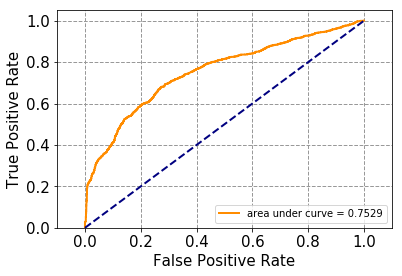

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
predicted_test_label = clf.predict(test_svd_data)
print ("Accuracy: ", smet.accuracy_score(y_test, predicted_test_label))
print ("Recall: ", smet.recall_score(y_test, predicted_test_label))
print ("Precision: ", smet.precision_score(y_test, predicted_test_label))
print ("Confusion matrix: ", smet.confusion_matrix(y_test, predicted_test_label))
print ("F1 score: ", smet.f1_score(y_test, predicted_test_label))
prob_score = clf.predict_proba(test_svd_data)
fit_predict_and_plot_roc(clf, train_svd_data, y_train, test_svd_data, y_test, prob_score)

# Second model: Naive Bayes with NMF

In [18]:
processing_nmf = Pipeline([('vect', vectorizer),
                ('tfidf', tfidf_transformer),
                ('nmf', nmf),
                ('norm', normalizer),
                ])

train_nmf_data = processing_nmf.fit_transform(X_train)
test_nmf_data = processing_nmf.fit_transform(X_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB # BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf3 = MultinomialNB().fit(train_nmf_data, y_train)
prob_score = clf3.predict_proba(test_nmf_data)



Accuracy:  0.4760339632977266
Recall:  0.21495327102803738
Precision:  0.3927427961579509
Confusion matrix:  [[1370  569]
 [1344  368]]
F1 score:  0.2778406946017365


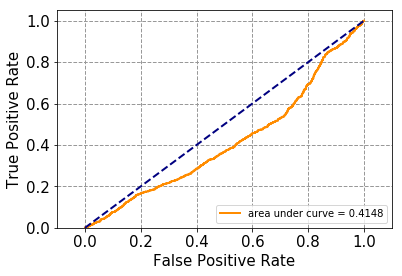

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
predicted_test_label = clf3.predict(test_nmf_data)

print ("Accuracy: ", smet.accuracy_score(y_test, predicted_test_label))
print ("Recall: ", smet.recall_score(y_test, predicted_test_label))
print ("Precision: ", smet.precision_score(y_test, predicted_test_label))
print ("Confusion matrix: ", smet.confusion_matrix(y_test, predicted_test_label))
print ("F1 score: ", smet.f1_score(y_test, predicted_test_label))

fit_predict_and_plot_roc(clf3, train_nmf_data, y_train, test_nmf_data, y_test, prob_score)

# Second model v2: Naive bayes BernoulliNB with SVD

Accuracy:  0.5708025198575732
Recall:  0.6133177570093458
Precision:  0.5370843989769821
Confusion matrix:  [[1034  905]
 [ 662 1050]]
F1 score:  0.5726752113444232


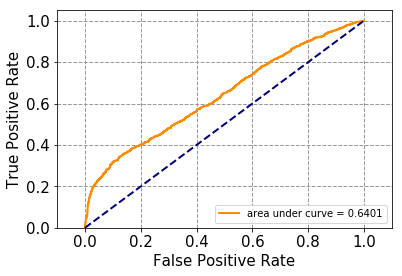

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB # BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf3 = BernoulliNB().fit(train_svd_data, y_train)
prob_score = clf3.predict_proba(test_svd_data)
predicted_test_label = clf3.predict(test_svd_data)

print ("Accuracy: ", smet.accuracy_score(y_test, predicted_test_label))
print ("Recall: ", smet.recall_score(y_test, predicted_test_label))
print ("Precision: ", smet.precision_score(y_test, predicted_test_label))
print ("Confusion matrix: ", smet.confusion_matrix(y_test, predicted_test_label))
print ("F1 score: ", smet.f1_score(y_test, predicted_test_label))

fit_predict_and_plot_roc(clf3, train_svd_data, y_train, test_svd_data, y_test, prob_score)

# Third model: Logistic regression with regularization term l2 SVD

logistic regression with regularization term l2: 
Accuracy:  0.702273349767187
Recall:  0.6226635514018691
Precision:  0.7073656270736562
Confusion matrix:  [[1498  441]
 [ 646 1066]]
F1 score:  0.5726752113444232


/Users/yuqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


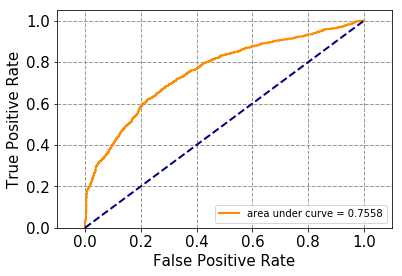

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
from sklearn import linear_model
# cstrength = []
# for k in range(-3, 5):
#     cstrength.append((10**k))
print ("logistic regression with regularization term l2: ")

logistic = linear_model.LogisticRegression(penalty='l2', C = 0.001)
logistic.fit(train_svd_data, y_train)
predicted_lr_label = logistic.predict(test_svd_data)
#print ("cstrength: ", c)
print ("Accuracy: ", smet.accuracy_score(y_test, predicted_lr_label))
print ("Recall: ", smet.recall_score(y_test, predicted_lr_label))
print ("Precision: ", smet.precision_score(y_test, predicted_lr_label))
print ("Confusion matrix: ", smet.confusion_matrix(y_test, predicted_lr_label))
print ("F1 score: ", smet.f1_score(y_test, predicted_test_label))
prob_score = logistic.predict_proba(test_svd_data)
fit_predict_and_plot_roc(logistic, train_svd_data, y_train, test_svd_data, y_test, prob_score)

# Forth model: Random Forest

/Users/yuqi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.6409202958093673
Recall:  0.5613317757009346
Precision:  0.6318211702827088
Confusion matrix:  [[1379  560]
 [ 751  961]]
F1 score:  0.5944942777605939


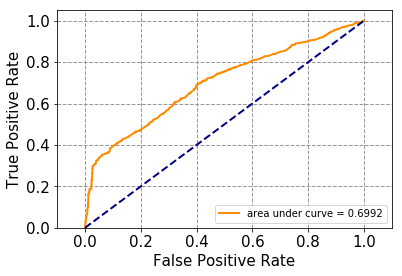

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(train_svd_data, y_train)
prob_score = clf3.predict_proba(test_svd_data)
predicted_test_label = clf3.predict(test_svd_data)

print ("Accuracy: ", smet.accuracy_score(y_test, predicted_test_label))
print ("Recall: ", smet.recall_score(y_test, predicted_test_label))
print ("Precision: ", smet.precision_score(y_test, predicted_test_label))
print ("Confusion matrix: ", smet.confusion_matrix(y_test, predicted_test_label))
print ("F1 score: ", smet.f1_score(y_test, predicted_test_label))

fit_predict_and_plot_roc(clf3, train_svd_data, y_train, test_svd_data, y_test, prob_score)

# Fifth model: decision tree

Accuracy:  0.6003834565872364
Recall:  0.657126168224299
Precision:  0.5633450175262894
Confusion matrix:  [[1067  872]
 [ 587 1125]]
F1 score:  0.6066325155028309


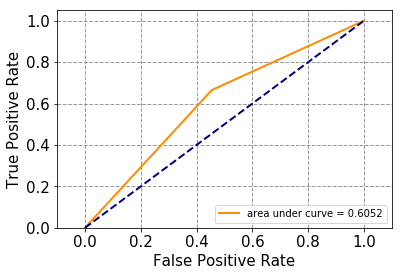

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(random_state=0)
clf3.fit(train_svd_data, y_train)
prob_score = clf3.predict_proba(test_svd_data)
predicted_test_label = clf3.predict(test_svd_data)

print ("Accuracy: ", smet.accuracy_score(y_test, predicted_test_label))
print ("Recall: ", smet.recall_score(y_test, predicted_test_label))
print ("Precision: ", smet.precision_score(y_test, predicted_test_label))
print ("Confusion matrix: ", smet.confusion_matrix(y_test, predicted_test_label))
print ("F1 score: ", smet.f1_score(y_test, predicted_test_label))

fit_predict_and_plot_roc(clf3, train_svd_data, y_train, test_svd_data, y_test, prob_score)